# PyTorch Tutorial

Notes from the PyTorch [_60 minute blitz_](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

## 1. Tensors

In [1]:
import torch
import numpy as np

### 1.1 Tensor initialization

In [3]:
# Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
# From np array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

Can init from another tensor; retains properties (shape, dtype) of arg tensor unless overridden

In [6]:
# From another tensor
x_ones = torch.ones_like(x_data) # retains properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype = torch.float) # overrides datatype of x_data
print(f"Random tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random tensor: 
 tensor([[0.2893, 0.0930],
        [0.0496, 0.6610]]) 



In [7]:
shape = (2, 3, ) # tuple of tensor dimensions

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor: \n {rand_tensor} \n")
print(f"Ones tensor: \n {ones_tensor} \n")
print(f"Zeros tensor: \n {zeros_tensor} \n")

Random tensor: 
 tensor([[0.0968, 0.1391, 0.1394],
        [0.2633, 0.8982, 0.7416]]) 

Ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### 1.2 Tensor attributes
- Shape
- Datatype
- Device storage location

In [8]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1.3 Tensor operations

In [10]:
# Can move to GPU
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
else:
    print("GPU not available")

GPU not available


Standard np-like indexing & slicing

In [12]:
tensor = torch.ones(4, 4)
tensor[:, 1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


__Joining tensors__ : use `torch.cat` to concat sequence of tensors along a given dimension

In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


__Element-wise multiplication__

In [16]:
print(f"Element-wise product: tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
print(f"Alternative syntax: tensor * tensor \n {tensor * tensor}")

Element-wise product: tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

Alternative syntax: tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


__Matrix multiplication__

In [18]:
print(f"Matrix multiplication: tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
print(f"Alternative syntax: tensor @ tensor.T \n {tensor @ tensor.T}")

Matrix multiplication: tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

Alternative syntax: tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


__In-place operations__ :
- `_` suffix $\implies$ in-place
- e.g. `x.copy_(y)` and `x.t_()` will change the source `x`

In [19]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


_Note_ :
- In-place ops save some memory
- Problem with derivative computation: loss of history!
- Not the best to use...

### 1.4 Bridge with numpy

- Tensors on CPU & np.arrays can share underlying memory locations
- Changing one will change the other!

__Tensor to np.array__ :

In [20]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Change in the tensor `t` reflected in the numpy array `n`:

In [21]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


__np.array to tensor__

Likewise, change in np.array reflected in tensor

In [22]:
n = np.ones(5)
t = torch.from_numpy(n)

# Change in np.array reflected in tensor!
np.add(n, 1, out = n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2. Introduction to `torch.autograd`

`torch.autograd` : pytorch autodiff engine

### 2.1 Usage in pytorch

_Example_ : 
- Load pretrained `resnet18` from `torchvision`
- Create random data tensor: single img w/3 channels, height & width = 64, & corresponding random label

In [23]:
import torchvision

In [24]:
model = torchvision.models.resnet18(pretrained = True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/rschmidt/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Forward pass:

In [25]:
prediction = model(data)

Calculate the loss

In [27]:
loss = (prediction - labels).sum()

Backprop w/autograd; gradients stored in `.grad` param attributes

In [28]:
loss.backward()

Load optimizer and register parameters

In [29]:
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

- Call `.step()` to init GD
- Optimizer adjusts each param by grad stored in `.grad()`

In [30]:
optim.step()

### 2.2 Differentiation in autograd

Examine how `autograd` collects gradients

_Example_ :
- Two tensors: `a`, `b`
- `requires_grad = True` : every operation should be tracked

In [31]:
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6., 4.], requires_grad = True)

Create tensor $Q$ from $a$ and $b$:

$$Q = 3a^3 - b^2$$

In [32]:
Q = 3*a**3 - b**2

Suppose $Q$ is error for NN w/params $a, b$:

\begin{align}
    \frac{\partial Q}{\partial a} &= 9a^2 \\
    \frac{\partial Q}{\partial b} &= -2b
\end{align}

_Notes_ :
- Calling `.backward()` on `Q` calculates grads & stoes in tensors' `.grad()` attribute
- Need to explicitly pass `gradient` arg in `Q.backward()` b/c `Q` is vector!
- `gradient` : tensor of same shape as `Q` ($\frac{\partial Q}{\partial Q} = 1$)

_Alternatively_ : can aggragate $Q$ into scalar and call backward implicitly, e.g. `Q.sum().backward()`

In [33]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient = external_grad)

The above gradients are deposited into `a.grad`, `b.grad`

In [34]:
# Check if grads worked
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### 2.3 Computational graph

__Autograd__ : keeps record of tensors & opterations in DAG of function objects

__Forward pass__ : does two things simultaneously
1. Run requested op to compute resulting tensor
2. Maintain op's gradient function in DAG

__Backward pass__: begins when `.backward()` called in DAG root; `autograd` does the following:
1. Computes grads from each `.grad_fn`
2. Accumulates these in respective tensor's `.grad` attribute
3. Propagates to leaf tensors using chain rule


_Note_ : PyTorch DAGs are __dynamic__
- Graph recreated from scratch after each `.backward()` call
- Allows changing of shape, size, and ops at every iteration if needed


### 2.4 Exclusion from the DAG

- `requires_grad = False` : for tensors that don't require gradients (__frozen parameters__)
- Output tensor of operation will require gradients even if only single input tensor has `requires_Grad = True`

In [35]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad = True)

a = x + y
print(f"Does 'a' require gradients? : {a.requires_grad}")

b = x + z
print(f"Does 'b' require gradients? : {b.requires_grad}")

Does 'a' require gradients? : False
Does 'b' require gradients? : True


DAG exclusion also helpful for pretrained nets!

In [36]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained = True)

# Freeze all params in network
for param in model.parameters():
    param.requires_grad = False

_Example_ : want to finetune model on new dataset w/10 labels
- Resnet classifier is last linear layer: `model.fc`
- Can replace with new linear layer, unfrozen by default

In [37]:
model.fc = nn.Linear(512, 10)

In [38]:
# Optimize only the classifier
optimizer = optim.SGD(model.fc.parameters(), lr = 0.01, momentum = 0.9)

See also: `torch.no_grad()`

## 3. Neural Networks

Package: `torch.nn`
- Layers contained in `nn.Module`
- `forward(input)` returns `output`

### 3.1 Example: basic ConvNet

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel; 6 output channels; 3x3 square CONV
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # fc layers
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6*6 from image dim
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pool over (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If image is square, can only specify single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:] # all dims except batch dim
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


- Only need to define `forward` function
- `backward` automatically defined using `autograd`
- Learnable parameters in `net.parameters()`


In [51]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 3, 3])


_Example_ : try random $(32, 32)$ input

In [52]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0826,  0.0002, -0.0716,  0.0358, -0.0366, -0.0872,  0.1007, -0.1234,
          0.0376, -0.0028]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all params & backprops with random grads:

In [53]:
net.zero_grad()
out.backward(torch.randn(1, 10))

_Notes_ :
- `torch.nn` only supports mini-batches (not single-sample!)
- e.g. `nn.Conv2d` expects $(\text{nSamples}, \text{nChannels}, \text{Height}, \text{Width})$
- For single sample, use `input.unsqueeze(0)` for fake batch dimension

### 3.2 Loss function

_Example_ : `nn.MSELoss`

In [54]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1) # make same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3464, grad_fn=<MseLossBackward>)


- Calling `loss.backward()` causes graph to be diff'ed wrt loss
- All tensors in graph w/`requires_grad = True` have `.grad` tensor accumulated w/gradient

In [56]:
# Example: follow a few steps backward
print(loss.grad_fn) # MSE loss
print(loss.grad_fn.next_functions[0][0]) # linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

### 3.3 Backprop

To backprop error: `loss.backward()`; _need to clear existing gradients!_

In [57]:
# Look at conv1 bias grads before/after backprop
net.zero_grad() # zero grad buffers of all params

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0040, -0.0110, -0.0165,  0.0068,  0.0124,  0.0019])


### 3.4 Updating the weights

__SGD__ : $w := w - \alpha \cdot \nabla_x w$

In [59]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

`torch.optim` for update rules

In [60]:
import torch.optim as optim

# Create optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# Training loop
optimizer.zero_grad() # zero the grad buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # update

## 4. Training a Classifier

_Dealing with data_ :
1. Use python packages to load into some form of np.array
2. Convert array into `torch.*Tensor`

_Useful packages_ :
- Images: Pillow, OpenCV
- Audio: scipy, librosa
- Text: raw python, cython-loading, NLTK, SpaCy

_Common datasets_ : in `torchvision`

### 4.1 Example: CIFAR10 classifier

First, load CIFAR10

In [61]:
import torch
import torchvision
import torchvision.transforms as transforms

Output of torchvision datasets: PILImage images of range $[0, 1]$; want to transform to tensors in $[-1, 1]$

In [62]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root = "./data", train = True,
                                       download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                         shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = "./data", train = False,
                                   download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                        shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


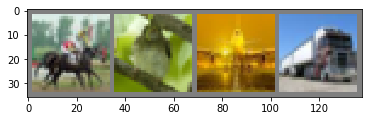

horse  bird plane truck


In [65]:
# Examine some of the training data
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# Get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 4.2 Defining the ConvNet

In [66]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

### 4.3 Loss and optimizer

In [67]:
# xentropy loss + SGD w/momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

### 4.4 Training

Loop over data iterator, feed inputs to net, and optimize

In [69]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs; data is list of [inputs, labels]
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print stats
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished training!')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.814
[1,  6000] loss: 1.638
[1,  8000] loss: 1.559
[1, 10000] loss: 1.493
[1, 12000] loss: 1.477
[2,  2000] loss: 1.410
[2,  4000] loss: 1.368
[2,  6000] loss: 1.329
[2,  8000] loss: 1.330
[2, 10000] loss: 1.314
[2, 12000] loss: 1.281
Finished training!


Save the trained model:

In [70]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 4.5 Evaluate on test data

Thus far: trained for two epochs; check performance on test set

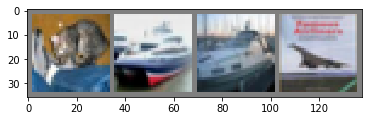

Ground truth:    cat  ship  ship plane


In [71]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print images
imshow(torchvision.utils.make_grid(images))
print('Ground truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Load in the saved model

In [78]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [79]:
# Get outputs
outputs = net(images)

In [80]:
# Get index of max proba
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog horse plane horse


Check performance on the entire dataset:

In [81]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of network on 10k test images: %d %%' % (100 * correct / total))

Accuracy of network on 10k test images: 55 %


Check which classes performed the best

In [83]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 65 %
Accuracy of  bird : 44 %
Accuracy of   cat : 28 %
Accuracy of  deer : 38 %
Accuracy of   dog : 37 %
Accuracy of  frog : 72 %
Accuracy of horse : 69 %
Accuracy of  ship : 61 %
Accuracy of truck : 62 %


### 4.6 GPU training

Can transfer neural net to GPU; check if CUDA available

In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [ ]:
# Converts to CUDA tensors if gpu
net.to(device)

# Need to send inputs, targets at every step to GPU
inputs, labels = data[0].to(device), data[1].to(device)